In [1]:
# importing the dependencies
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [5]:
for dirname, _, filenames in os.walk('..\Datasets\Digit Recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Datasets\Digit Recognizer\sample_submission.csv
..\Datasets\Digit Recognizer\test.csv
..\Datasets\Digit Recognizer\test.csv.zip
..\Datasets\Digit Recognizer\train.csv
..\Datasets\Digit Recognizer\train.csv.zip


In [12]:
# loading the dataset
train_df = pd.read_csv("../Datasets/Digit Recognizer/train.csv")
test_df = pd.read_csv("../Datasets/Digit Recognizer/test.csv")
train = pd.read_csv("../Datasets/Digit Recognizer/train.csv") 
test = pd.read_csv("../Datasets/Digit Recognizer/test.csv")

In [10]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train = train_df['label']
del train_df['label']

In [22]:
y_train.tail()

41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

In [18]:
train_df.shape

(42000, 784)

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)

In [21]:
y_train_bin

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [23]:
X_train = train_df.values
X_test = test_df.values

In [25]:
X_train.shape

(42000, 784)

In [27]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train_all = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32')
X_test_all = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_bin, test_size=0.20, random_state=42, shuffle=True)

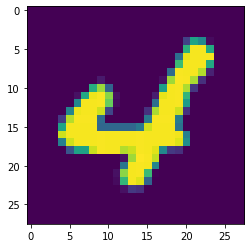

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
index = 500
plt.imshow(X_train[index])
plt.show()
y_train[index]

In [35]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1050/1050 [==============================] - 42s 39ms/step - loss: 0.3217 - accuracy: 0.8992 - val_loss: 0.1248 - val_accuracy: 0.9604
Epoch 2/20
1050/1050 [==============================] - 51s 49ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.0949 - val_accuracy: 0.9730
Epoch 3/20
1050/1050 [==============================] - 55s 52ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0775 - val_accuracy: 0.9758
Epoch 4/20
1050/1050 [==============================] - 59s 57ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0681 - val_accuracy: 0.9794
Epoch 5/20
1050/1050 [==============================] - 54s 51ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0636 - val_accuracy: 0.9795
Epoch 6/20
1050/1050 [==============================] - 55s 53ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0560 - val_accuracy: 0.9831
Epoch 7/20
1050/1050 [==============================] - 52s 50ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0547 -

In [40]:
model.save('cnn_3l_20.h5')

In [41]:
def create_submission(predictions,keys,path):
    result = pd.DataFrame(
        predictions,
        columns=['Label'],
        index=keys
        )
    result.index.name='ImageId'
    result.to_csv(path, index=True)

In [42]:
predictions_prob=model.predict(X_test_all) # get predictions for all the test data

875/875 [==============================] - 8s 9ms/step


In [43]:
labels=[np.argmax(pred) for pred in predictions_prob]

In [48]:
keys=[i for i in range(1,28001) ]

In [49]:
create_submission(predictions=labels,keys=keys,path='submission_cnn_3l_20.csv')

Prediction Score on Kaggle: 0.98435